# Introduction
We will create a class for logistic regression from scratch. We will implement the algorithm using only the minimum library such as NumPy.

In [50]:
# predefines and imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Class

In [51]:
from mpl_toolkits import mplot3d

class ScratchLogisticRegression():
  def __init__(self,num_iter, lr, no_bias, verbose):
    # Record hyperparameters as attributes
    self.iter = num_iter
    self.lr = lr
    self.no_bias = no_bias
    self.verbose = verbose
    # Prepare an array to record the loss
    self.loss = np.zeros(self.iter)
    self.val_loss = np.zeros(self.iter)
  def add_bias(self,data):
    if self.no_bias or data is None: return data

    bias = np.ones((data.shape[0],1))
    return np.hstack((bias,data))
            
  def fit(self, X, y, X_val=None, y_val=None):
    verbose = self.verbose
    # if verbose:
    #   print('Before bias: ')
    #   print(X)
    #   print(X_val)
    # add bias
    X = self.add_bias(X)
    X_val = self.add_bias(X_val)
    # if verbose:
    #   print('After bias: ')
    #   print(X)
    #   print(X_val)
    # check category labels
    self.labels = np.unique(y)
    if verbose: print('Labels: ', self.labels)
    #encode y to 0 and 1
    conv_y = np.vectorize(lambda yi: 0 if yi == self.labels[0] else 1)
    y = conv_y(y)
    #setup param and weight
    n, k = X.shape # tuple count and dim count
    self.theta = np.zeros(k)
    self.param_weight = np.ones(k)
    self.param_weight[0] = 0 #zero-th param is not included in regularization


    if verbose: 
      print('Tup count: ', n)
      print('Dim count: ', k)
    
    for i in range(self.iter):
      # if verbose: 
      #   print('Pred prob: ', self.predict_proba(X))
      #   print('Pred: ', self.predict(X[:,1:]))
      #   print('Loss: ', self.objective_func(X,y))
      
      # record loss
      self.loss[i] = self.objective_func(X,y)
      self.val_loss[i] = self.objective_func(X_val,y_val)
      # train
      grad = self.gradient(X,y)
      self.theta = self.theta - self.lr * grad

      # if self.verbose:
      #   print('Gradient: ')
      #   print(grad)
    if verbose:    
      print('Train loss: ')
      print(self.loss)
      print(' Val Loss: ')
      print(self.val_loss)
    return None
  def gradient(self,X,y):
    n = X.shape[0]
    grad = X.T @ (self.predict_proba(X, bias_added = True) - y)/n
    normalize_term = (self.param_weight* self.theta)/n
    return grad + normalize_term
  def predict(self, X):
    pred = np.vectorize(lambda proba: self.labels[1] if proba>0.5 else self.labels[0])
    return pred(self.predict_proba(X))
    
  def predict_proba(self, X, bias_added = False):
    return 1 / (1 + np.exp(- self.linear_hypo(X,bias_added = bias_added)))
  def linear_hypo(self,X, bias_added):
    X = X if self.no_bias or bias_added else self.add_bias(X)
    # print('Debug: ', X.shape,  self.theta.shape)
    return X @ self.theta
  def objective_func(self,X,y):
    if X is None: return 0
    
    predicted = self.predict_proba(X, bias_added = True)
    # if self.verbose:
    #   print('predicted: ', predicted)
    n = X.shape[0]
    obj = -(y* np.log(predicted)+(1-y)*np.log(1-predicted)).mean()
    # if self.verbose: 
    #   print('debug log10 error')
    #   print(predicted, 1.00 - predicted)
    normalize_term = (self.param_weight/ (2*n) * self.theta**2).mean()/2
    # print('Obj:', obj + normalize_term)
    return obj + normalize_term

# Problem 1
Hypothetical Function

- Sigmoid Function:

    $ g(z) = \frac{1}{1 + e^{-z}} $
- Linear regression hypothesys:
    
    $ h_\theta (x) = \theta^T.X $

- Logistic assumption function:

    $ h_\theta (x) = \frac {1}{1 + e^{- \theta^T.X}}$

# Problem 2
Steepest Descend

**Added fit in the code**

# Problem 3
Estimated 

**Added predict and predict_proba in code**

# Problem 4
Objective Function

**Added Obj Func in code**

# Problem 5
Learning and Estimation

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
def classification_problem(X, Y, models, test_size = 0.2):
    result = []
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = test_size)
    for model in models:
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        result.append((
            model.__class__.__name__,
            confusion_matrix(y_test, y_pred),
            accuracy_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            precision_score(y_test, y_pred),))
    
    return result


from  sklearn.datasets import load_iris
iris_data = load_iris(as_frame = True)
i_x = iris_data.data
i_y = iris_data.target
choosen_tuple = (i_y == 0) | (i_y == 1)
i_x = i_x[choosen_tuple]
i_y = i_y[choosen_tuple]
print('X shape: ',i_x.shape)
print('Classes: ',np.unique(i_y))
from sklearn.linear_model import SGDClassifier

scratch_model = ScratchLogisticRegression(num_iter = 50, lr = 0.1, no_bias = False, verbose = False)
models = [
    SGDClassifier(max_iter= 50, alpha = 0.1, verbose = False),
    scratch_model,
    LogisticRegression(max_iter = 50)
]
result = classification_problem(i_x,i_y,models)

for name, conf_matrix, accuracy, recall, percision in result:
    print('----------------------')
    print('Model: ',name)
    print('Acc:',accuracy)
    print('Recall: ',recall)
    print('Percision: ', percision)
    display(conf_matrix)

X shape:  (100, 4)
Classes:  [0 1]
----------------------
Model:  SGDClassifier
Acc: 1.0
Recall:  1.0
Percision:  1.0


array([[ 5,  0],
       [ 0, 15]], dtype=int64)

----------------------
Model:  ScratchLogisticRegression
Acc: 1.0
Recall:  1.0
Percision:  1.0


array([[ 5,  0],
       [ 0, 15]], dtype=int64)

----------------------
Model:  LogisticRegression
Acc: 1.0
Recall:  1.0
Percision:  1.0


array([[ 5,  0],
       [ 0, 15]], dtype=int64)

# Problem 6
Plot of learning curve

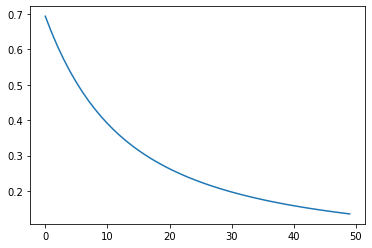

In [53]:
plt.plot(scratch_model.loss)

# Problem 7
Visualization of decision area

### Here i try to plot the log regression line

shape x:  (100, 4)


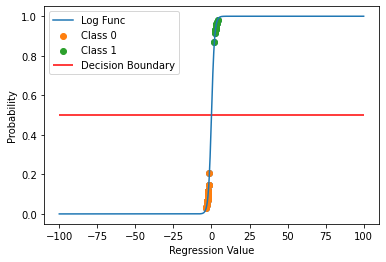

In [54]:
# i_x = i_x.iloc[:,0:1]
new_scratch_model = ScratchLogisticRegression(num_iter = 100, lr = 0.1, no_bias = False, verbose = False)
print('shape x: ',i_x.shape)
# print(i_x)
x_train,x_test,y_train,y_test = train_test_split(i_x,i_y, test_size = 0.5)
new_scratch_model.fit(x_train,y_train)
pred_y = new_scratch_model.predict_proba(x_test)
reg_x = new_scratch_model.linear_hypo(x_test,bias_added = False)
plt.scatter(reg_x,pred_y)
pred_label = new_scratch_model.predict(x_test)
x1 = reg_x[pred_label == 0]
x2 = reg_x[pred_label == 1]
y1 = pred_y[pred_label == 0]
y2 = pred_y[pred_label == 1]

domain = np.linspace(-100,100,1000).reshape(-1,1)

# log_line = new_scratch_model.predict_proba(domain)
log_line = 1 / (1 + np.exp (- domain))
plt.plot(domain,log_line, label = 'Log Func')
plt.scatter(x1,y1, label = 'Class 0')
plt.scatter(x2,y2, label = 'Class 1')
plt.hlines(0.5,-100,100, label = 'Decision Boundary', colors = 'red')
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Regression Value')
plt.show()



### Here i plot the decision bound of training on 2 dimension

(86130, 2)


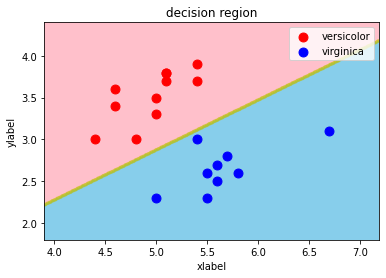

In [55]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'],class_count = 2):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['green', 'red', 'blue'] if class_count == 3 else ['red', 'blue']
    contourf_color = ['lightgreen','pink', 'skyblue'] if class_count == 3 else ['pink', 'skyblue']
    n_class = class_count
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print(mesh.shape)
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

from  sklearn.datasets import load_iris
iris_data = load_iris(as_frame = True)
i_x = iris_data.data
i_y = iris_data.target
choosen_tuple = (i_y == 0) | (i_y == 1)
i_x = i_x[choosen_tuple]
i_y = i_y[choosen_tuple]

x_np = np.array(i_x)[:,0:2]
y_np = np.array(i_y)
# print(x_np.shape, y_np.shape)
x_train,x_test,y_train,y_test = train_test_split(x_np,y_np, test_size = 0.2)
new_scratch_model.fit(x_train,y_train)
decision_region(x_test,y_test,new_scratch_model)
